In [2]:
%pip install rocketpy


     -------------------------------------- 110.8/110.8 KB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 14.6/14.6 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 KB 1.7 MB/s eta 0:00:00
     -------------------------------------- 500.6/500.6 KB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 45.7/45.7 MB 2.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 38.6/38.6 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 53.0/53.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py)

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
from rocketpy import Environment


In [4]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [10]:
from datetime import datetime
datehj=datetime(2022,8,28,1,41)
Env=Environment(railLength=3,latitude=-23.6661558,longitude=-46.6904554,elevation=750,date=datehj)


Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length: 3  m
Launch Date: 2022-08-28 01:41:00 UTC
Launch Site Latitude: -23.66616°
Launch Site Longitude: -46.69046°
Launch Site Surface Elevation: 750.0 m


Atmospheric Model Details

Atmospheric Model Type: StandardAtmosphere
StandardAtmosphere Maximum Height: 80.000 km


Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 926.34 hPa
Surface Temperature: 283.27 K
Surface Air Density: 1.139 kg/m³
Surface Speed of Sound: 337.21 m/s


Atmospheric Model Plots


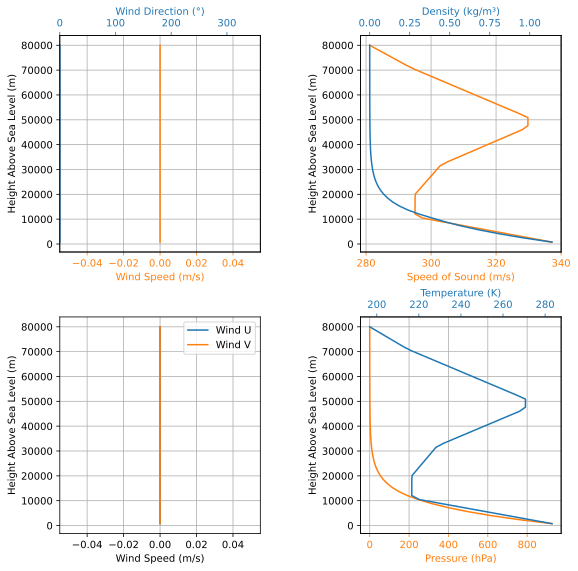

In [13]:
Env.allInfo()


In [14]:
Env.setAtmosphericModel(type="Forecast", file="GFS")

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\rocketpy\Environment.py:1825: UserWarning: Exact chosen launch time is not available in the provided file, using 2022-08-28 03:00:00 UTC instead.
  warnings.warn(


Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length: 3  m
Launch Date: 2022-08-28 01:41:00 UTC
Launch Site Latitude: -23.66616°
Launch Site Longitude: -46.69046°
Launch Site Surface Elevation: 775.3 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.831 km
Forecast Time Period: From  2022-08-27 18:00:00  to  2022-09-12 18:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 1.28 m/s
Surface Wind Direction: 69.67°
Surface Wind Heading: 185.00°
Surface Pressure: 929.49 hPa
Surface Temperature: 294.31 K
Surface Air Density: 1.100 kg/m³
Surface Speed of Sound: 343.91 m/s


Atmospheric Model Plots


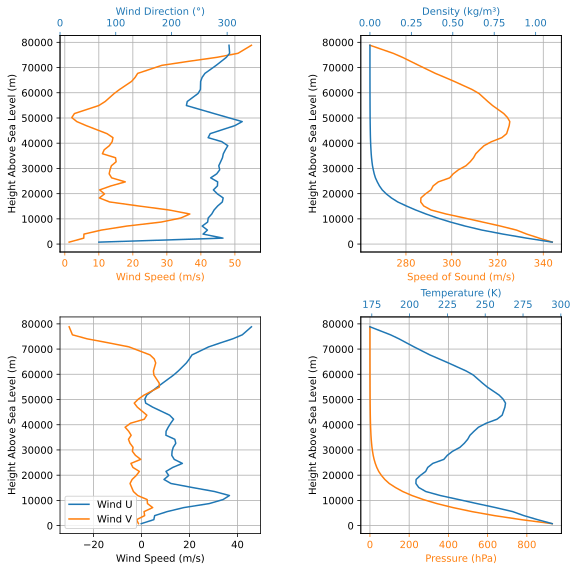

In [15]:
Env.allInfo()

In [16]:
from rocketpy import SolidMotor

In [17]:
motomoto=SolidMotor(thrustSource=[[0.0,0],[3.0,1000],[5.0,10000],[8.0,50000],[10.0,100000],[15.0,1000],[20.0,0]],
                    burnOut=20.0,
                    grainNumber=3,
                    grainDensity=500,
                    grainOuterRadius=0.025,
                    grainInitialInnerRadius=0.010,
                    grainInitialHeight=0.10,
                    grainSeparation=0.005,
                    nozzleRadius=0.0030,
                    )

Nozzle Details
Nozzle Radius: 0.003 m
Nozzle Throat Radius: 0.0114 m

Grain Details
Number of Grains: 3
Grain Spacing: 0.005 m
Grain Density: 500 kg/m3
Grain Outer Radius: 0.025 m
Grain Inner Radius: 0.01 m
Grain Height: 0.1 m
Grain Volume: 0.000 m3
Grain Mass: 0.082 kg

Motor Details
Total Burning Time: 20.0 s
Total Propellant Mass: 0.247 kg
Propellant Exhaust Velocity: 2051330.378 m/s
Average Thrust: 25375.000 N
Maximum Thrust: 100000.0 N at 10.0 s after ignition.
Total Impulse: 507500.000 Ns

Plots


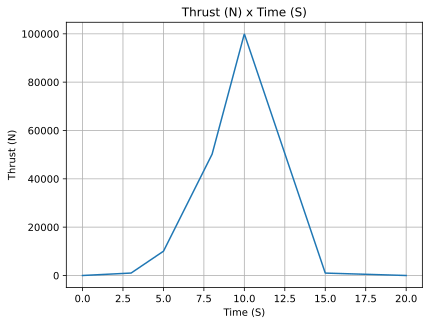

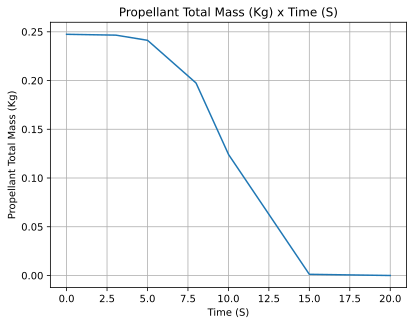

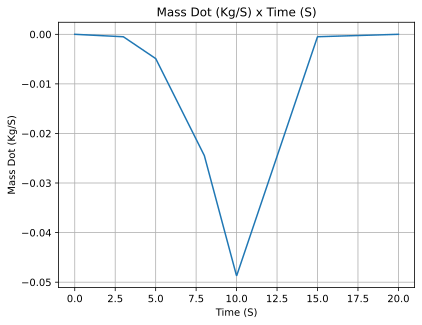

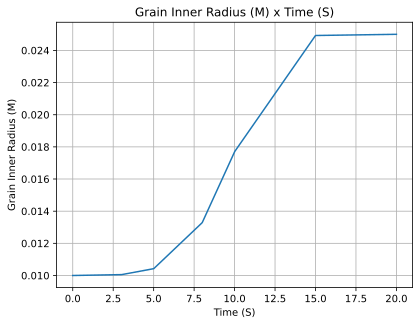

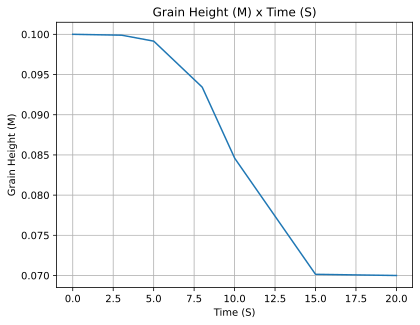

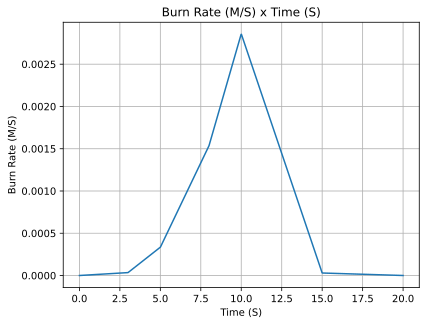

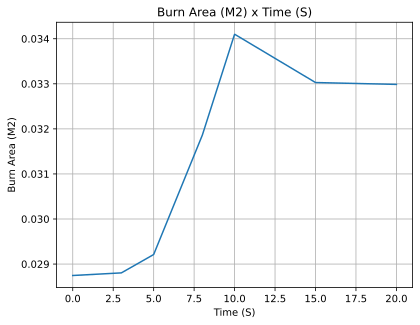

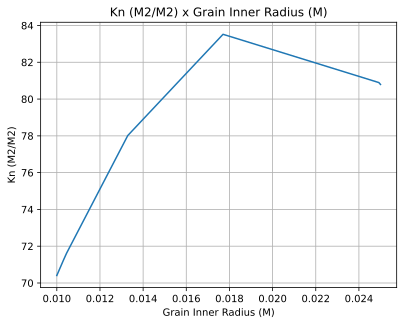

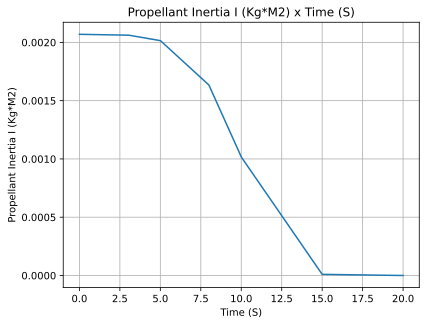

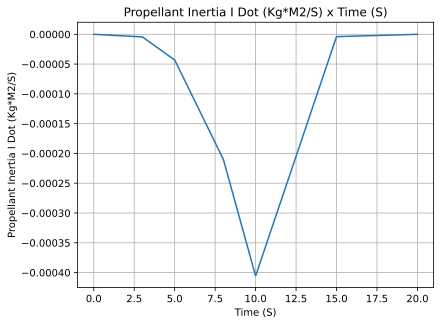

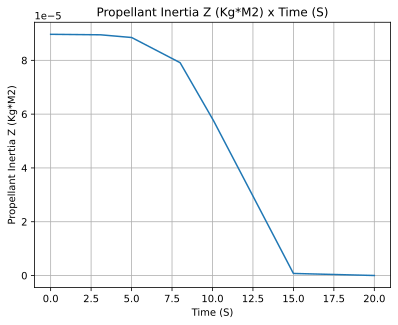

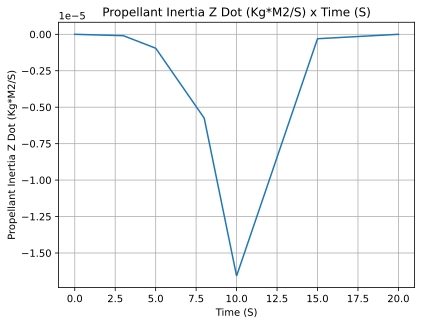

In [18]:
motomoto.allInfo()

In [19]:
from rocketpy import Rocket

In [28]:
foguetao=Rocket(motomoto,mass=20,inertiaI=7.0,inertiaZ=0.03,radius=0.03,distanceRocketNozzle=-1.25,distanceRocketPropellant=-0.85704,powerOffDrag=0.3,powerOnDrag=0.3 )
foguetao.setRailButtons([0.2, -0.5])

In [21]:
NoseCone = foguetao.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = foguetao.addFins(
    4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
)

Tail = foguetao.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

In [23]:
def drogueTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False


def mainTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate main when vz < 0 m/s and z < 800 + 1400 m (+1400 due to surface elevation).
    return True if y[5] < 0 and y[2] < 800 + 1400 else False


Main = foguetao.addParachute(
    "Main",
    CdS=10.0,
    trigger=mainTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = foguetao.addParachute(
    "Drogue",
    CdS=1.0,
    trigger=drogueTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Inertia Details
Rocket Mass: 20.000 kg (No Propellant)
Rocket Mass: 20.247 kg (With Propellant)
Rocket Inertia I: 7.000 kg*m2
Rocket Inertia Z: 0.030 kg*m2

Geometrical Parameters
Rocket Maximum Radius: 0.03 m
Rocket Frontal Area: 0.002827 m2

Rocket Distances
Rocket Center of Mass - Nozzle Exit Distance: -1.25 m
Rocket Center of Mass - Motor reference point: -0.85704 m
Rocket Center of Mass - Rocket Loaded Center of Mass: -0.010 m

Aerodynamic Components Parameters
Currently not implemented.

Aerodynamics Lift Coefficient Derivatives
Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 20.433/rad
Tail Lift Coefficient Derivative: -4.756/rad

Aerodynamics Center of Pressure
Nose Cone Center of Pressure to CM: 0.999 m
Fins Center of Pressure to CM: -1.105 m
Tail Center of Pressure to CM: -1.223 m
Distance - Center of Pressure to CM: -0.835 m
Initial Static Margin: 13.738 c
Final Static Margin: 13.913 c

Main Parachute
CdS Coefficient: 10.0 m2
Ejection signa

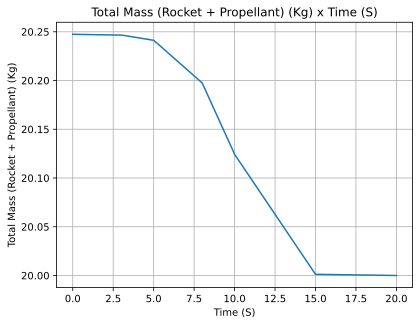

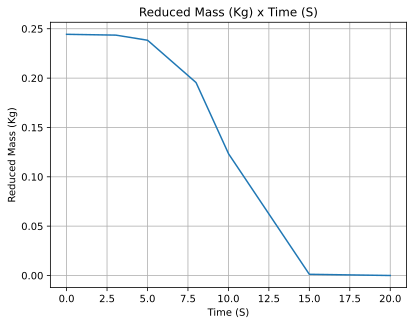


Aerodynamics Plots


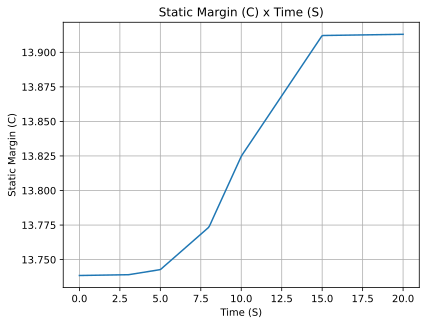

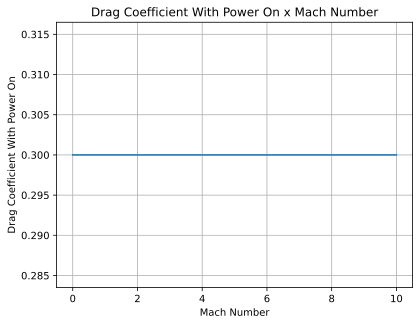

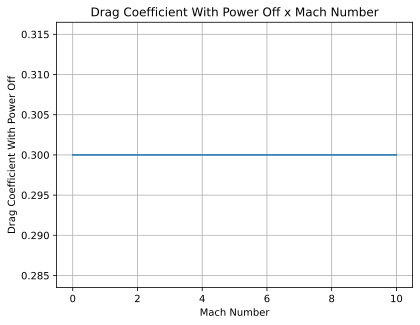

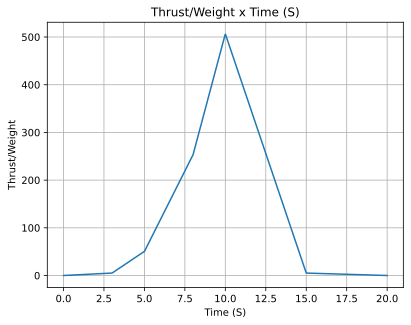

In [25]:
Rocket.allInfo(foguetao)

In [26]:
from rocketpy import Flight

In [29]:
ovoo=Flight(foguetao,Env,89.5,0,)

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 775.34 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 1.000 | e1: -0.004 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -0.50° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 89.50°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: -1.27 m/s
Lateral Surface Wind Speed: 0.12 m/s


 Rail Departure State

Rail Departure Time: 1.546 s
Rail Departure Velocity: 7.433 m/s
Rail Departure Static Margin: -0.174 c
Rail Departure Angle of Attack: 9.736°
Rail Departure Thrust-Weight Ratio: 2.595
Rail Departure Reynolds Number: 2.741e+04


BurnOut State

BurnOut time: 20.000 s
Altitude at burnOut: 242068.025 m (AGL)
Rocket velocity at burnOut: 24096.709 m/s
Freestream velocity at burnOut: 24097.036 m/s
Mach Number at burnOut: 91.184
Kinetic energy at burnOut: 5.807e+09 J


A

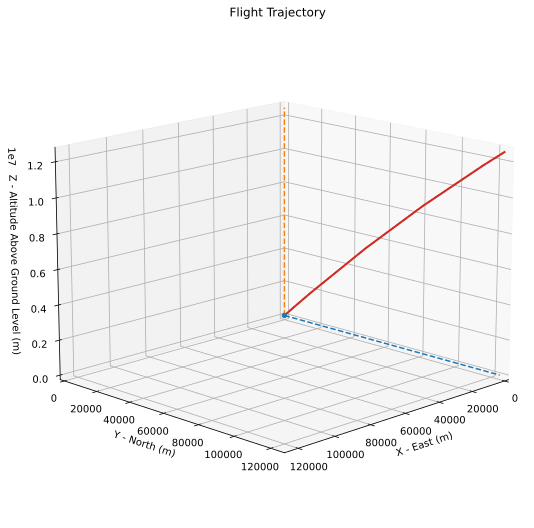



Trajectory Kinematic Plots



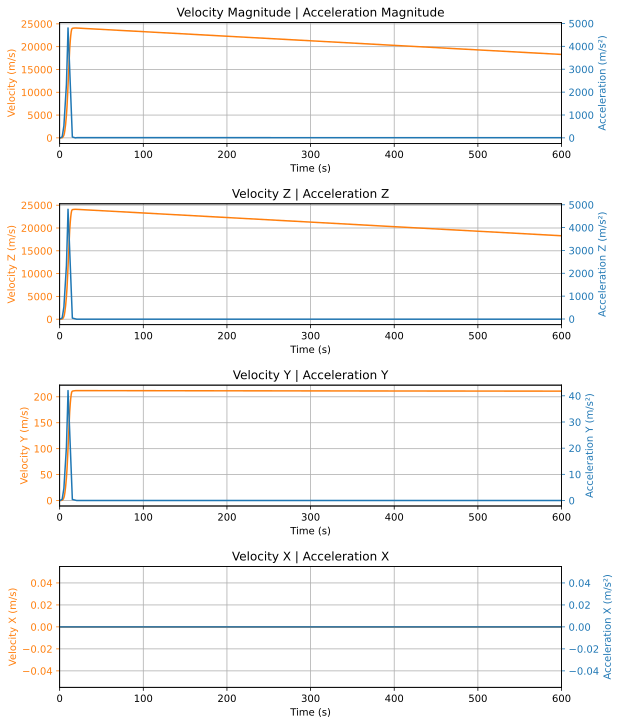



Angular Position Plots



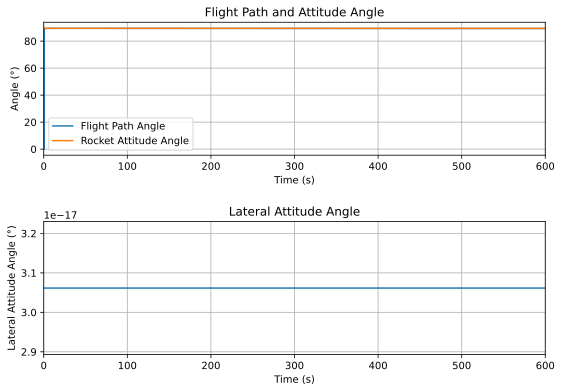



Path, Attitude and Lateral Attitude Angle plots



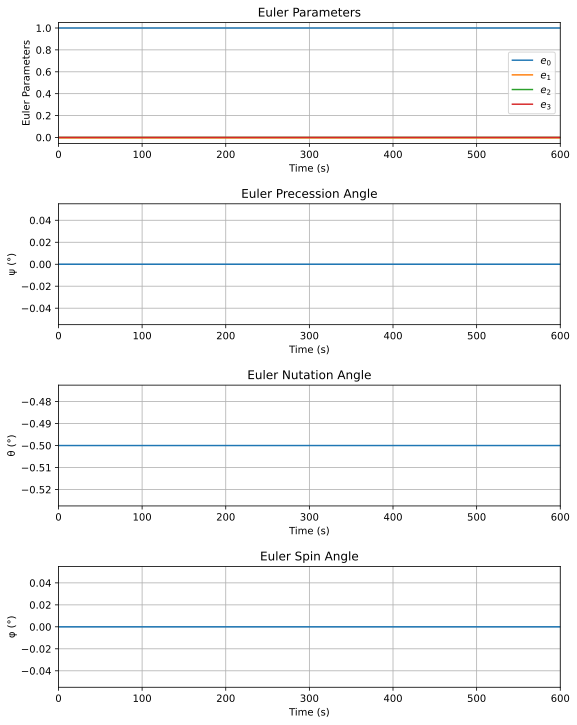



Trajectory Angular Velocity and Acceleration Plots



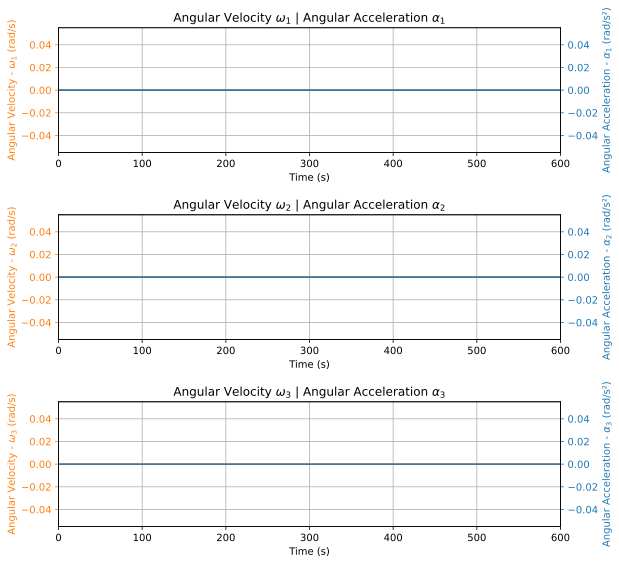



Trajectory Force Plots



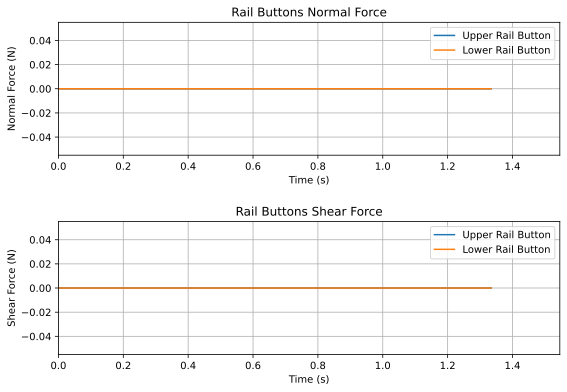

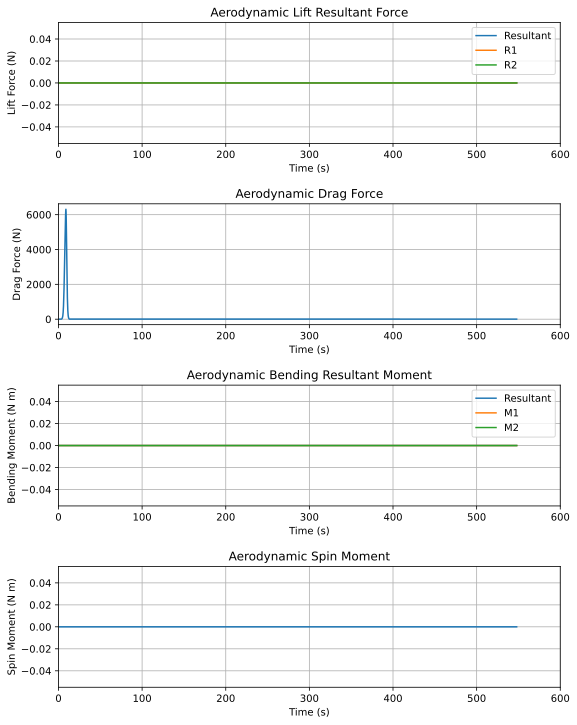



Trajectory Energy Plots



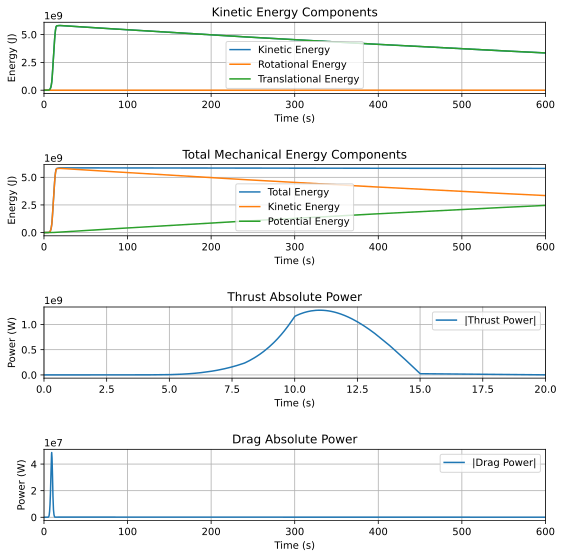



Trajectory Fluid Mechanics Plots



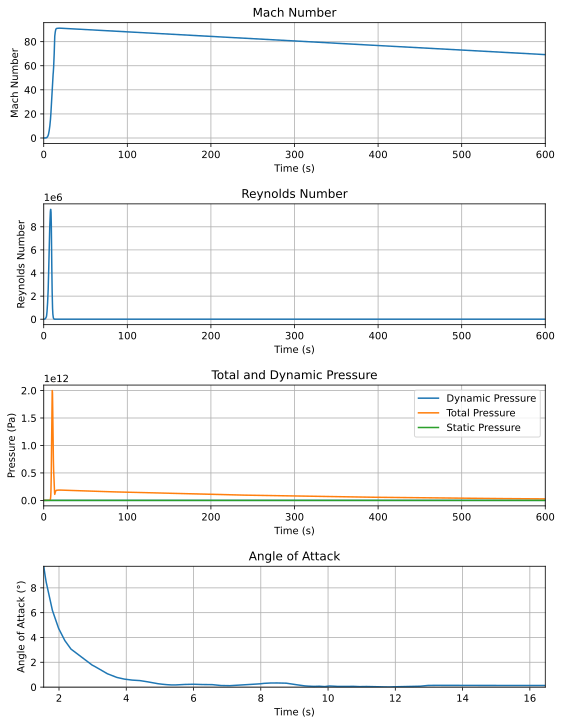



Trajectory Stability and Control Plots



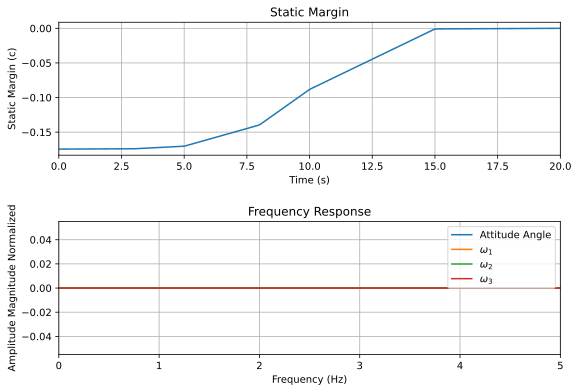

In [30]:
ovoo.allInfo()

In [32]:
ovoo.exportKML()

File  trajectory.kml  saved with success!
